In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.io import loadmat

# [DEBUG] Scalar LST - Python Eigen-Decomposition algorithm

This file is to check if errors are computational error generated by python's eigen-decomposition.

In [14]:
vars = loadmat("/home/zejiany/Documents/Projects/python_util/data/scalar_LST_matlab_linux.mat")
vars.keys()
D0 = vars["D0p"]
D2 = vars["D2p"]

U = vars["U"]

/home/zejiany/.local/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [15]:
# Input parameters 
N       = 384 # number of Chebyshev polynomials

R  = 180         # Reynolds number
kx = 1           # streamwise wavenumber
kz = 0           # spanwise wavenumber
Ri = 0.0        # Richardson number
Pr = 0.71        # Prantl number
Ra = 8*R*R/Pr*Ri # Rayleigh number

In [16]:
k2 = kx**2 + kz**2 
M  =  np.ones(shape=(1, N))
er = -200*1j 

A = -1j*kx*(U@M)*D0 + (1/R/Pr)*(D2-k2*D0)
B = D0


A[0, :] = 0
A[N-1, :] = 0

A[0, :] = er*D0[0, :]
A[N-1, :] = er*D0[N-1, :]

In [17]:
A - vars["A"]

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

In [18]:
# find eigenvalues
# omega, q = linalg.eig(A, B)
omega, q = np.linalg.eig(np.linalg.inv(B)@A)


omega = 1j*omega   # eigenvalues omega in vector form

# remove bad eigenvalues
sp = np.logical_and(abs(omega)>1e-10, abs(omega)<50)

omega = omega[sp]
q = q[:, sp]

In [19]:
Temperature = - D0 @ q

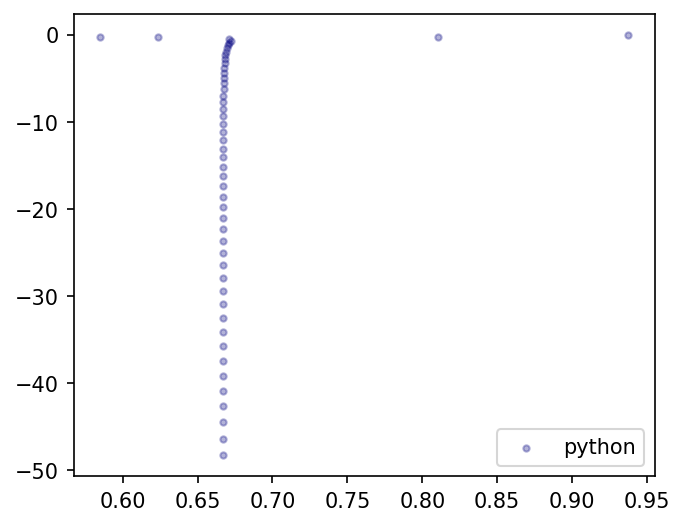

In [20]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=150)
ax.scatter(np.real(omega), np.imag(omega), marker='.', color='navy', alpha=0.3, label='python')
ax.legend()
# ax.set_xlim(0, 1)
# ax.set_ylim(-10, 5)

In [21]:
def plot_sym(ax, x, y, **kwargs):
    dx = x[-1] - x[-2::-1]
    x = np.append(x, x[-1] + dx)
    y = np.append(y, y[-2::-1])
    ax.plot(x, y, **kwargs)
    return


def plot_eigmode(ax, y, eigmode,  **kwargs):
    ax.plot(y, np.abs(eigmode)/np.max(np.abs(eigmode)), **kwargs)
    return ax

[11 12 25 26]
[20 22 32 33]


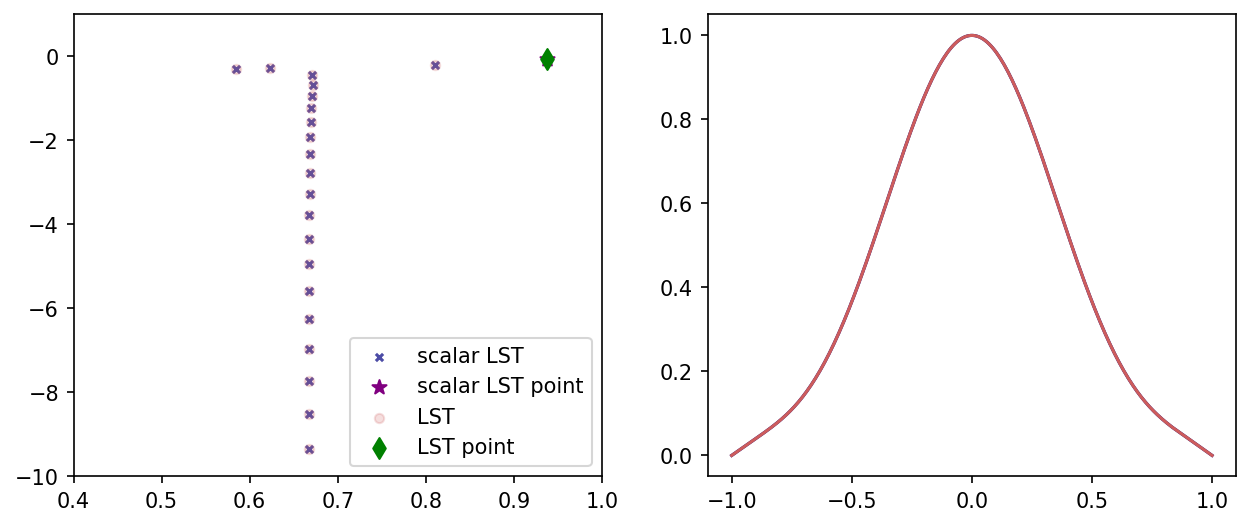

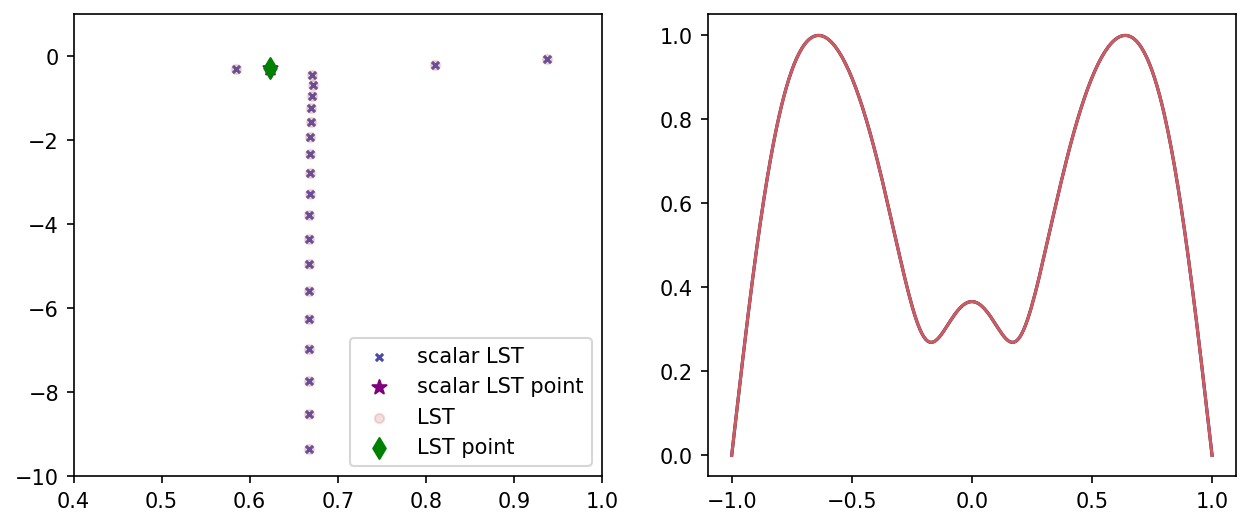

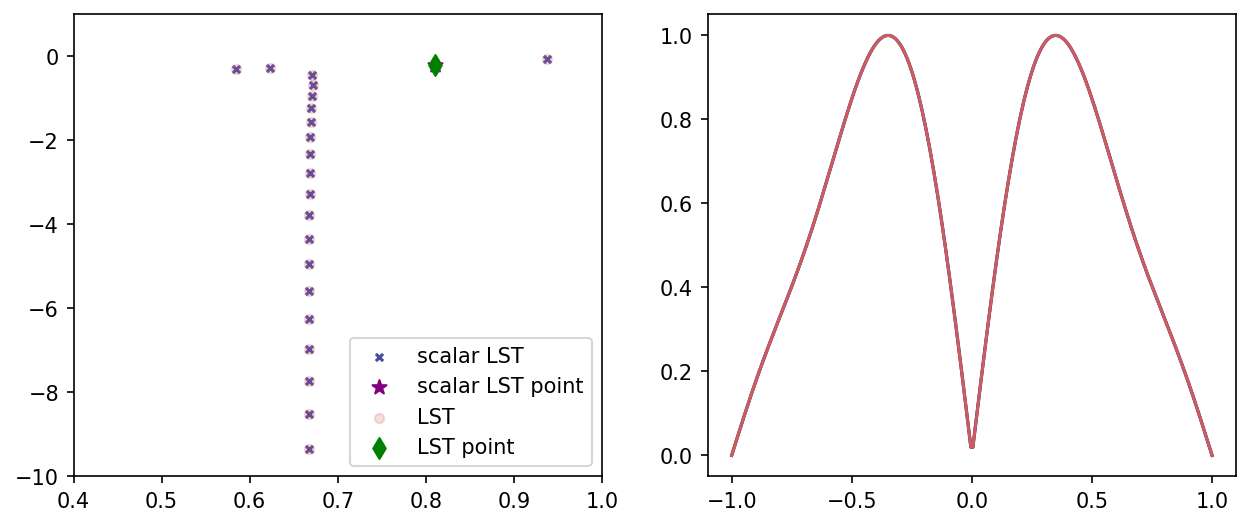

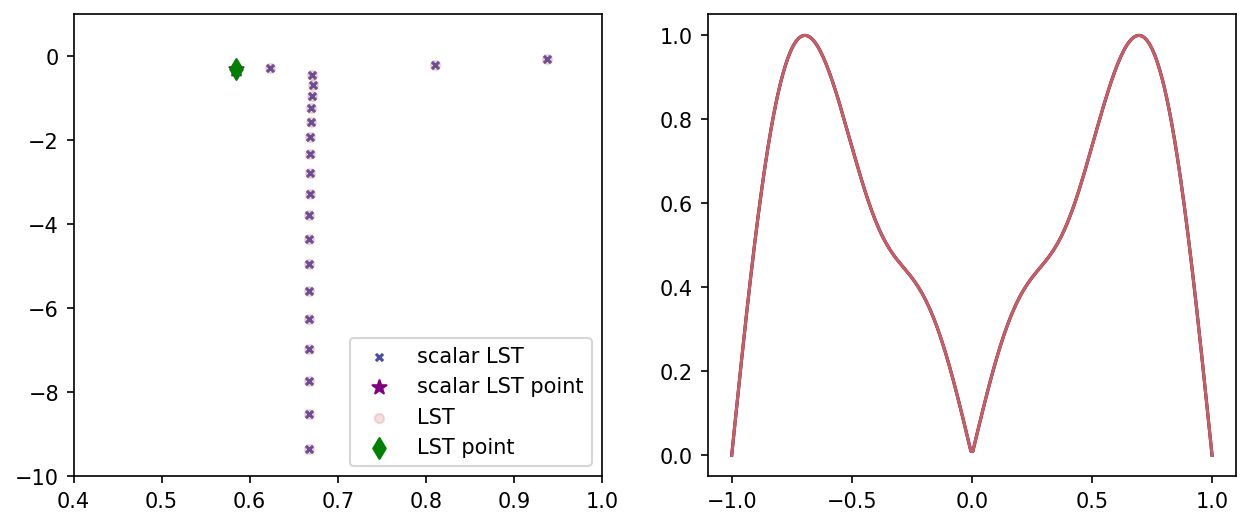

In [22]:
scalar_lst_indset = np.where(np.imag(omega)>-0.4)[0]
lst_indset = np.where(np.imag(vars["omega"])>-0.4)[0]

print(scalar_lst_indset)
print(lst_indset)



for ind, _ in enumerate(lst_indset):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=150)
    
    scatter_set = []
    scatter_set.append(axes[0].scatter(np.real(omega), np.imag(omega), s= 12, marker='x', color='navy', alpha=0.7, label='scalar LST'))
    scatter_set.append(axes[0].scatter(np.real(omega[scalar_lst_indset[ind]]), np.imag(omega[scalar_lst_indset[ind]]), s= 50, marker='*', color='purple', label='scalar LST point'))
    scatter_set.append(axes[0].scatter(np.real(vars["omega"]), np.imag(vars["omega"]), s= 20, marker='o', color='indianred', alpha=0.2, label='LST'))
    scatter_set.append(axes[0].scatter(np.real(vars["omega"][lst_indset[ind]]), np.imag(vars["omega"][lst_indset[ind]]), s= 50, marker='d', color='green', label='LST point'))

    axes[0].set_ylim(-10, 1)
    axes[0].set_xlim(0.4, 1)
    labs = [l.get_label() for l in scatter_set]
    axes[0].legend(scatter_set, labs, loc=0)

    # axes[1].plot(vars["y_phys"], np.abs(Temperature[:, scalar_lst_indset[ind]]), color="navy")
    # axes[1].plot(vars["y_phys"], vars["Temperature"][:, lst_indset[ind]], color="indianred")
    plot_eigmode(axes[1], vars["y_phys"], Temperature[:, scalar_lst_indset[ind]], color="navy")
    plot_eigmode(axes[1], vars["y_phys"], vars["Temperature"][:, lst_indset[ind]], color="indianred")

## Conclusion

As we can see from this comparison of the eigenvalues and eigenmodes matching very well, we could conclude that the bugs are lied into the chebyshev basis function.